<function matplotlib.pyplot.show(close=None, block=None)>

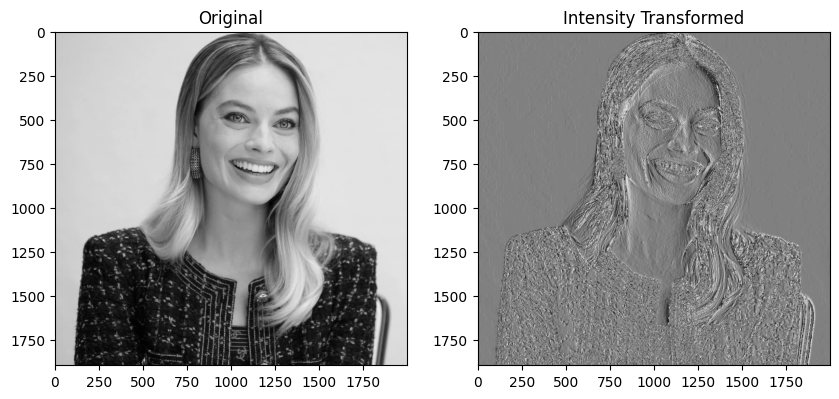

In [1]:
#Created with the help of Dr. Ranga during the image processing lecture
#Q1

import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

im1 = cv.imread('images/margot.jpg')
assert im1 is not None
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
#imports the image as a grayscale reduced image

kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype= np.float32)
hw = kernel.shape[0]//2
#creates a matrix that is used for the 2D convolution

rows, cols = im1.shape[0], im1.shape[1]
#defines the variables for the rows and columns depending on the size of the image

im2 = np.zeros(im1.shape, dtype=np.uint8)
#creates an empty matrix to the size of im1

for i in range (hw, rows - hw):
    for j in range (hw, cols - hw):
        im2[i,j] = np.sum(np.sum(im1[i-hw:i+hw+1,j-hw:j+hw+1]* kernel))
#for loops that map the convoluted sum of the image and the kernel to im2

fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(im1, vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(im2 + 128, vmin=0, vmax=255)
ax[1].set_title('Intensity Transformed')
plt.show
#display functions

In [12]:
#Question 2 - Gamma Correction

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread('images/highlights_and_shadows.jpg')
assert im1 is not None

gamma= 0.7
invG = 1.0/gamma
h = np.array([((i/255.0)**invG) * 255 for i in range(256)], dtype=np.uint8) 

im2 = h[im1]

cv.imshow('Original image', im1)
cv.imshow('Gamma corrected image', im2)
cv.waitKey(0)
cv.destroyAllWindows()